In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
def crear_dataframe_con_lags(temperaturas, num_lags=5):
    data = {}
    
    for i in range(1, num_lags + 1):
        data[f'lag_{i}'] = temperaturas.shift(i)
        
    data['temperatura'] = temperaturas
    
    df = pd.DataFrame(data)
    
    df = df.dropna()
    
    return df

In [4]:
dd = pd.read_csv('temp_2020_2024.csv', index_col='DateTime')['TEMP']
dd

DateTime
2020-01-01 00:00:00    20.2
2020-01-01 01:00:00    20.0
2020-01-01 02:00:00    20.1
2020-01-01 03:00:00    20.2
2020-01-01 04:00:00    19.8
                       ... 
2024-05-31 19:00:00    25.6
2024-05-31 20:00:00    25.3
2024-05-31 21:00:00    23.9
2024-05-31 22:00:00    22.0
2024-05-31 23:00:00    21.1
Name: TEMP, Length: 38712, dtype: float64

In [5]:
dd.isnull().sum()

0

In [6]:
dados = crear_dataframe_con_lags(dd)

In [7]:
dados

,lag_1,lag_2,lag_3,lag_4,lag_5,temperatura
DateTime,,,,,,
2020-01-01 05:00:00,19.8,20.2,20.1,20.0,20.2,19.6
2020-01-01 06:00:00,19.6,19.8,20.2,20.1,20.0,19.1
2020-01-01 07:00:00,19.1,19.6,19.8,20.2,20.1,19.6
2020-01-01 08:00:00,19.6,19.1,19.6,19.8,20.2,19.8
2020-01-01 09:00:00,19.8,19.6,19.1,19.6,19.8,19.4
...,...,...,...,...,...,...
2024-05-31 19:00:00,25.6,25.7,25.2,24.5,23.4,25.6
2024-05-31 20:00:00,25.6,25.6,25.7,25.2,24.5,25.3
2024-05-31 21:00:00,25.3,25.6,25.6,25.7,25.2,23.9


### Regre_Linear

In [8]:
X = dados.drop(columns=['temperatura'])
y = dados['temperatura']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

# Opcional: Mostrar coeficientes del modelo
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
print(coeficientes)


Error Cuadrático Medio (MSE): 1.05
Coeficiente de Determinación (R^2): 0.94
       Coeficiente
lag_1     1.291706
lag_2    -0.247915
lag_3    -0.030084
lag_4    -0.040311
lag_5    -0.086776


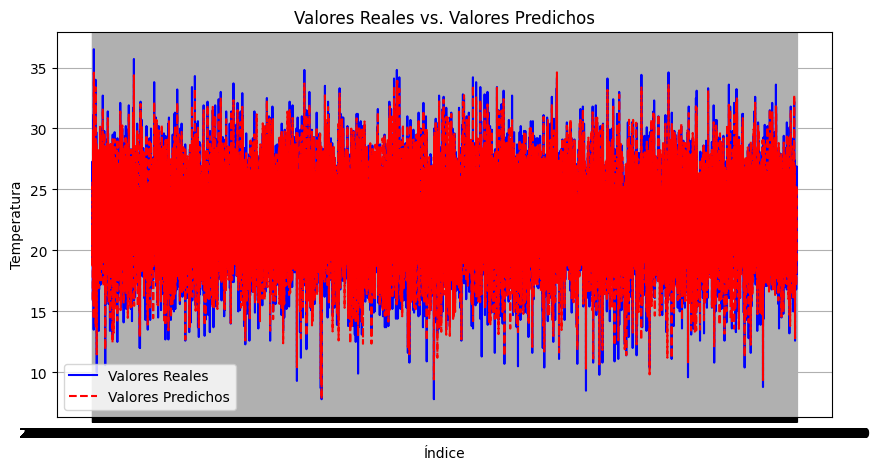

In [9]:
# Crear un DataFrame con valores reales y predicciones
df_resultados = pd.DataFrame({'Valores Reales': y_test, 'Valores Predichos': y_pred})

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_resultados.index, df_resultados['Valores Reales'], label='Valores Reales', color='b')
plt.plot(df_resultados.index, df_resultados['Valores Predichos'], label='Valores Predichos', color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Temperatura')
plt.title('Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

### Random_forest


In [10]:
# Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Error Cuadrático Medio (MSE): 1.02
Coeficiente de Determinación (R^2): 0.94


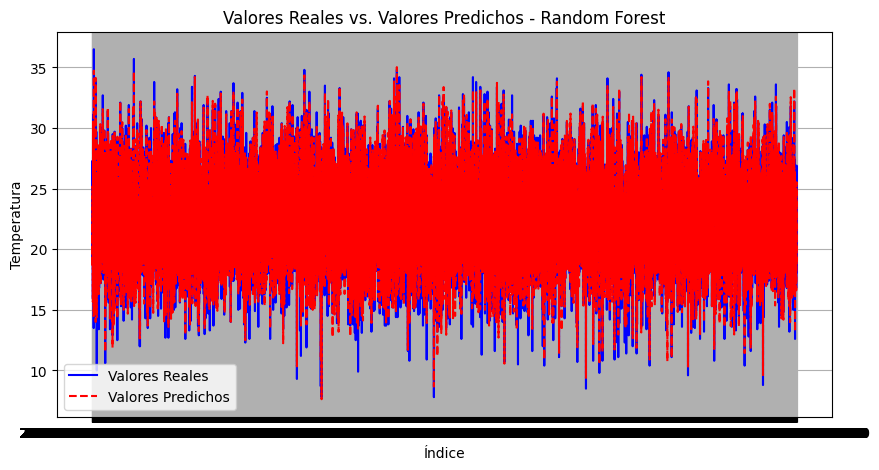

In [11]:
df_resultados = pd.DataFrame({'Valores Reales': y_test, 'Valores Predichos': y_pred})

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_resultados.index, df_resultados['Valores Reales'], label='Valores Reales', color='b')
plt.plot(df_resultados.index, df_resultados['Valores Predichos'], label='Valores Predichos', color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Temperatura')
plt.title('Valores Reales vs. Valores Predichos - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

### Gradient Boosting Regressor (GBR)


In [12]:
# Crear y entrenar el modelo
modelo_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
modelo_gbr.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_gbr.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - MSE: {mse:.2f}, R^2: {r2:.2f}")

Gradient Boosting - MSE: 0.98, R^2: 0.94


### Sequential

In [13]:


# Crear el modelo
modelo_nn = Sequential()
modelo_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo_nn.add(Dense(32, activation='relu'))
modelo_nn.add(Dense(1))

# Compilar el modelo
modelo_nn.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
modelo_nn.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Hacer predicciones
y_pred = modelo_nn.predict(X_test).flatten()

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Red Neuronal - MSE: {mse:.2f}, R^2: {r2:.2f}")

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Red Neuronal - MSE: 0.99, R^2: 0.94


### Sequential-2

In [14]:

# Criando o modelo
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='linear'))


model2.save("model2.keras")
cp2 = ModelCheckpoint('model2.keras', save_best_only=True)
model2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics =[RootMeanSquaredError()])


model2.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, callbacks=[cp2])

#Predições
y_pred = model2.predict(X_test).flatten()

# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Red Neuronal - MSE: {mse:.2f}, R^2: {r2:.2f}")

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Red Neuronal - MSE: 0.96, R^2: 0.94


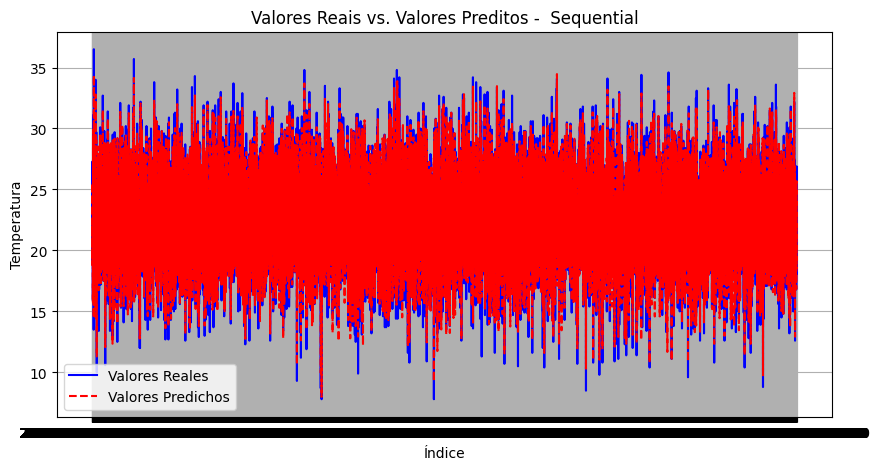

In [15]:
df_resultados = pd.DataFrame({'Valores Reales': y_test, 'Valores Predichos': y_pred})


plt.figure(figsize=(10, 5))
plt.plot(df_resultados.index, df_resultados['Valores Reales'], label='Valores Reales', color='b')
plt.plot(df_resultados.index, df_resultados['Valores Predichos'], label='Valores Predichos', color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Temperatura')
plt.title('Valores Reais vs. Valores Preditos -  Sequential')
plt.legend()
plt.grid(True)
plt.show()

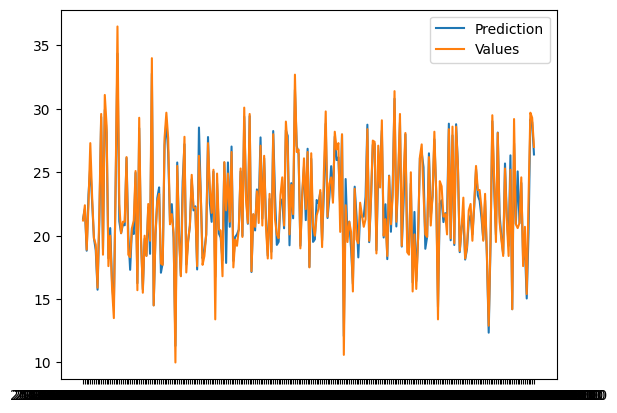

In [16]:
plt.plot(df_resultados['Valores Predichos'][:250], label='Prediction')
plt.plot(df_resultados['Valores Reales'][:250], label = 'Values')
plt.legend(loc='upper right')